In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
# import google drive
from google.colab import drive
import zipfile, os

# mounting drive
drive.mount('/content/drive')

# extract images.npy from crowd_counting.zip to /content
local_zip = '/content/drive/MyDrive/crowd counting dataset/crowd_counting.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Mounted at /content/drive


In [ ]:
# images.npy contains images that formatted as matrix or array
input_img = np.load('/content/images.npy')

input_img.shape # show the shape of array

(2000, 480, 640, 3)

In [ ]:
# each image has a label that represent how many people inside the room

label_df = pd.read_csv('/content/drive/MyDrive/crowd counting dataset/label_frame.csv') # mounting the labels

label_df.columns = ['id', 'people'] # adding id and people to columns

_ = []

for i in label_df.people:
  if i < 40 : _.append('sepi')
  else: _.append('rame')

kelas_df = pd.DataFrame(_)

kelas_df.columns = ['kelas']

new_label_df = pd.concat([label_df, kelas_df], axis='columns')

new_label_df.head()

,id,people,kelas
0,1,35,sepi
1,2,41,rame
2,3,41,rame
3,4,44,rame
4,5,41,rame


In [ ]:
labels = np.array(label_df['people']) # get the amount of people label from label_df dataframe

x_train, x_test, y_train, y_test = train_test_split(input_img, labels, test_size=0.1) # splitting the dataset into train and test set

In [ ]:
# creating CNN layers using tensorflow and keras model
model = tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(480, 640, 3)), # add the input shape as same as the array shape in cell number 7 output
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(1) # 'cause it's just predict the quantity, we just need single node in the output
                                  # for now we just leave the output layer with no activation function, need more further reading about single label activation function
])

### To predict quantity, all we need is regression loss functions
Further reading: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

Mean squared loss: https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError

In [ ]:
# start compiling model
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adamax(learning_rate=1e-6),
              metrics='mse')

In [ ]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=50,
                    batch_size=32)

Epoch 1/50
57/57 [==============================] - 74s 724ms/step - loss: 175.8741 - mse: 175.8741 - val_loss: 49.0418 - val_mse: 49.0418
Epoch 2/50
57/57 [==============================] - 39s 689ms/step - loss: 52.3165 - mse: 52.3165 - val_loss: 43.0924 - val_mse: 43.0924
Epoch 3/50
57/57 [==============================] - 39s 688ms/step - loss: 45.3294 - mse: 45.3294 - val_loss: 38.2890 - val_mse: 38.2890
Epoch 4/50
57/57 [==============================] - 39s 690ms/step - loss: 38.5680 - mse: 38.5680 - val_loss: 34.2294 - val_mse: 34.2294
Epoch 5/50
57/57 [==============================] - 39s 688ms/step - loss: 33.3076 - mse: 33.3076 - val_loss: 30.4090 - val_mse: 30.4090
Epoch 6/50
57/57 [==============================] - 39s 689ms/step - loss: 31.0476 - mse: 31.0476 - val_loss: 27.6529 - val_mse: 27.6529
Epoch 7/50
57/57 [==============================] - 39s 689ms/step - loss: 26.5660 - mse: 26.5660 - val_loss: 24.6974 - val_mse: 24.6974
Epoch 8/50
57/57 [=====================

Saving seq_000118.jpg to seq_000118.jpg
>> Jumlah orang: 41
Jumlah orang sangat banyak. Sulit untuk jaga jarak.


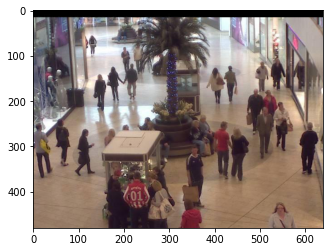

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import ceil
%matplotlib inline

uploaded = files.upload()

for i in uploaded.keys():
  path = i
  img = image.load_img(path, target_size=(480, 640))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predict = model.predict(images)

  print('>> Jumlah orang:', ceil(predict[0]))

  if (ceil(predict[0] > 40)): print('Jumlah orang sangat banyak dan sulit untuk jaga jarak.')
  else: print('Jumlah orang kurang dari batas dan masih bisa berjaga jarak.')

In [ ]:
label_df.loc[117]

id        118
people     41
Name: 117, dtype: int64

## New model with binary classification

In [ ]:
labels = np.array(new_label_df['people']) # get the amount of people label from label_df dataframe

x_train, x_test, y_train, y_test = train_test_split(input_img, labels, test_size=0.1) # splitting the dataset into train and test set

In [ ]:
# creating CNN layers using tensorflow and keras model
model = tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(480, 640, 3)), # add the input shape as same as the array shape in cell number 7 output
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid') # 'cause it's just predict the quantity, we just need single node in the output
                                  # for now we just leave the output layer with no activation function, need more further reading about single label activation function
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1193216)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               152731776 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=20,
          verbose=2)

Epoch 1/20


ResourceExhaustedError: ignored